# Comparison

## Functions

In [223]:
# Import libaries
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [215]:
# Time Conversion Function
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
 
    return "%d:%02d:%02d" % (hour, minutes, seconds)

## Main Codes

In [216]:
# File Path
file_path = []

for i in range(4):
    file_path.append('Model/Scenario'+str(i+1)+'/')

In [257]:
# Table scenario and description
table = {"Scenario": ['Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4'], 
         "Description": ['VGG19 with Keyframes Extraction', 'VGG19 without Keyframes Extraction', 'MobileNetV2 with Keyframes Extraction', 'MobileNetV2 without Keyframes Extraction'],}
print(tabulate(table, headers='keys', tablefmt='simple_outline', stralign='center'))

┌────────────┬──────────────────────────────────────────┐
│  Scenario  │               Description                │
├────────────┼──────────────────────────────────────────┤
│ Scenario 1 │     VGG19 with Keyframes Extraction      │
│ Scenario 2 │    VGG19 without Keyframes Extraction    │
│ Scenario 3 │  MobileNetV2 with Keyframes Extraction   │
│ Scenario 4 │ MobileNetV2 without Keyframes Extraction │
└────────────┴──────────────────────────────────────────┘


tabel kategori tindakan dengan rata-rata durasi video tindakan

gambar perbandingan cuplikan video acak dari masing-masing kategori tindakan

### Extraction Time

In [217]:
# Extraction Time
ext_time_arr = []

for path in file_path:
    with open(os.path.join(path, 'extraction_execution_time.txt'), 'r') as file:
        time = float(file.read())
        ext_time_arr.append([f"Scenario {file_path.index(path)+1}", 
                   time, 
                   convert(time)
                   ])

table = tabulate(ext_time_arr, 
                 headers=['Scenario', 'Execution Time (s)', 'Execution Time (hh:mm:ss)'], 
                 tablefmt='simple_outline', 
                 numalign='decimal',
                 stralign='center'
                 )

# Extraction Time
ke_time = ext_time_arr[0][1]
woke_time = ext_time_arr[1][1]

# Calculate the difference in time 
diff = ke_time - woke_time

# Calculate the times and percentage faster in time
diff_times = round(ke_time/woke_time, 2)
percentage = round((ke_time/woke_time)*100, 2)

# HTML Table Format
table_html = table = tabulate(row, 
                 headers=['Scenario', 'Execution Time (s)', 'Execution Time (hh:mm:ss)'], 
                 tablefmt='html', 
                 numalign='decimal',
                 stralign='center'
                 )

print(table_html)

<table>
<thead>
<tr><th style="text-align: center;"> Scenario </th><th style="text-align: right;">  Execution Time (s)</th></tr>
</thead>
<tbody>
<tr><td style="text-align: center;">Scenario 1</td><td style="text-align: right;">               14548</td></tr>
<tr><td style="text-align: center;">Scenario 2</td><td style="text-align: right;">              306061</td></tr>
<tr><td style="text-align: center;">Scenario 3</td><td style="text-align: right;">               14548</td></tr>
<tr><td style="text-align: center;">Scenario 4</td><td style="text-align: right;">              306061</td></tr>
</tbody>
</table>


<table>
<thead>
<tr><th style="text-align: center;"> Scenario </th><th style="text-align: right;">  Execution Time (s)</th><th style="text-align: center;"> Execution Time (hh:mm:ss) </th></tr>
</thead>
<tbody>
<tr><td style="text-align: center;">Scenario 1</td><td style="text-align: right;">            10267.6 </td><td style="text-align: center;">          2:51:07          </td></tr>
<tr><td style="text-align: center;">Scenario 2</td><td style="text-align: right;">              149.11</td><td style="text-align: center;">          0:02:29          </td></tr>
<tr><td style="text-align: center;">Scenario 3</td><td style="text-align: right;">            10267.6 </td><td style="text-align: center;">          2:51:07          </td></tr>
<tr><td style="text-align: center;">Scenario 4</td><td style="text-align: right;">              149.11</td><td style="text-align: center;">          0:02:29          </td></tr>
</tbody>
</table>


In [222]:
# Conclusion
print(table)

print("\nExecution Time (with keyframe extraction)    : ", ke_time)
print("Execution Time (without keyframe extraction) : ", woke_time)

print("\nDifference in Execution Time (s)        : ", diff)
print("Difference in Execution Time (hh:mm:ss) : ", convert(diff))

print(f"\nScenario without keyframe extraction is {diff_times} times or {percentage}% faster than Scenario with keyframe extraction")

┌────────────┬────────────────────┐
│  Scenario  │   Number of Frames │
├────────────┼────────────────────┤
│ Scenario 1 │              14548 │
│ Scenario 2 │             306061 │
│ Scenario 3 │              14548 │
│ Scenario 4 │             306061 │
└────────────┴────────────────────┘

Execution Time (with keyframe extraction)    :  10267.57
Execution Time (without keyframe extraction) :  149.11

Difference in Execution Time (s)        :  10118.46
Difference in Execution Time (hh:mm:ss) :  2:48:38

Scenario without keyframe extraction is 68.86 times or 6885.9% faster than Scenario with keyframe extraction


### Frames

In [219]:
# Number of Frames

# Convert CSV to dataframe
frm_arr = []

for path in file_path:
    with open(os.path.join(path, 'dataframe_data_initialization_split.csv'), 'r') as file:
        df = pd.read_csv(file)
        num_of_frames = len(df)
        frm_arr.append([f"Scenario {file_path.index(path)+1}", 
                    num_of_frames
                    ])
        
table = tabulate(frm_arr, 
                    headers=['Scenario', 'Number of Frames'], 
                    tablefmt='simple_outline', 
                    numalign='right',
                    stralign='center'
                    )

# Number of Frames
ke_frames = frm_arr[0][1]
woke_frames = frm_arr[1][1]

# Calculate the difference in frames
diff_frames = woke_frames - ke_frames

# Calculate the times and percentage faster in frames
diff_frames_times = round(woke_frames/ke_frames, 2)
percentage_frames = round((woke_frames/ke_frames)*100, 2)

# HTML Table Format
table_html = tabulate(frm_arr, 
                 headers=['Scenario', 'Number of Frames'], 
                 tablefmt='html', 
                 numalign='right',
                 stralign='center'
                 )

print(table_html)

<table>
<thead>
<tr><th style="text-align: center;"> Scenario </th><th style="text-align: right;">  Number of Frames</th></tr>
</thead>
<tbody>
<tr><td style="text-align: center;">Scenario 1</td><td style="text-align: right;">             14548</td></tr>
<tr><td style="text-align: center;">Scenario 2</td><td style="text-align: right;">            306061</td></tr>
<tr><td style="text-align: center;">Scenario 3</td><td style="text-align: right;">             14548</td></tr>
<tr><td style="text-align: center;">Scenario 4</td><td style="text-align: right;">            306061</td></tr>
</tbody>
</table>


<table>
<thead>
<tr><th style="text-align: center;"> Scenario </th><th style="text-align: right;">  Number of Frames</th></tr>
</thead>
<tbody>
<tr><td style="text-align: center;">Scenario 1</td><td style="text-align: right;">             14548</td></tr>
<tr><td style="text-align: center;">Scenario 2</td><td style="text-align: right;">            306061</td></tr>
<tr><td style="text-align: center;">Scenario 3</td><td style="text-align: right;">             14548</td></tr>
<tr><td style="text-align: center;">Scenario 4</td><td style="text-align: right;">            306061</td></tr>
</tbody>
</table>

In [220]:
# Conclusion
print(table)

print("\nNumber of Frames (with keyframe extraction)    : ", ke_frames)
print("Number of Frames (without keyframe extraction) : ", woke_frames)

print("\nDifference in Number of Frames : ", diff_frames)

print(f"\nScenario with keyframes extraction has {diff_frames_times} times or {percentage_frames}% less frames than Scenario without keyframes extraction")

┌────────────┬────────────────────┐
│  Scenario  │   Number of Frames │
├────────────┼────────────────────┤
│ Scenario 1 │              14548 │
│ Scenario 2 │             306061 │
│ Scenario 3 │              14548 │
│ Scenario 4 │             306061 │
└────────────┴────────────────────┘

Number of Frames (with keyframe extraction)    :  14548
Number of Frames (without keyframe extraction) :  306061

Difference in Number of Frames :  291513

Scenario with keyframes extraction has 21.04 times or 2103.8% less frames than Scenario without keyframes extraction


### Training Results

### plot model

### Model Accuracy and Loss

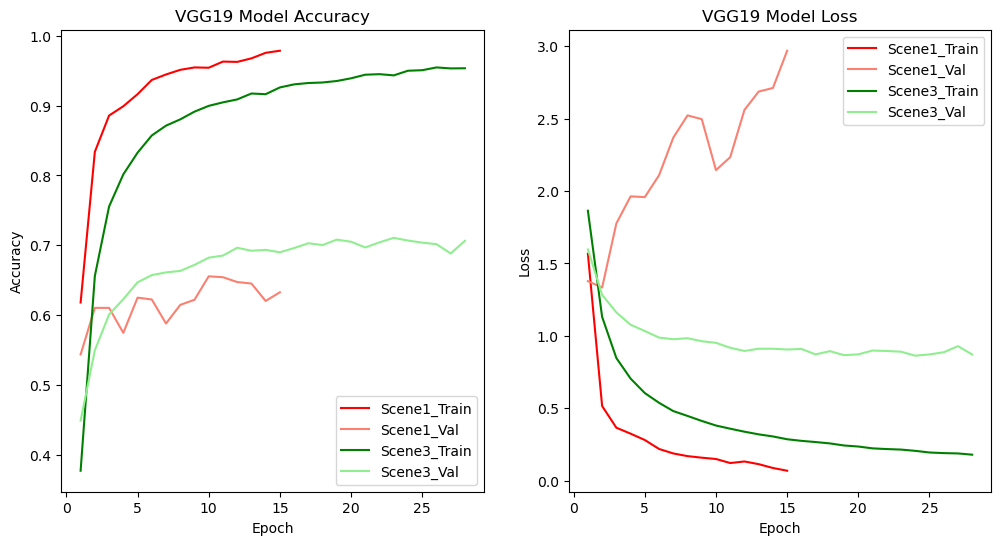

In [270]:
# VGG19 Model
history1 = pd.read_csv(os.path.join(file_path[0], 'history.csv'))
history2 = pd.read_csv(os.path.join(file_path[2], 'history.csv'))
history1.index+=1
history2.index+=1

# plot the accuracy and loss of the model side by side
plt.figure(figsize=(12, 6))

# plot the accuracy
plt.subplot(1, 2, 1)
plt.plot(history1['accuracy'], color='red')
plt.plot(history1['val_accuracy'], color='salmon')
plt.plot(history2['accuracy'], color='green')
plt.plot(history2['val_accuracy'], color='lightgreen')
plt.title('VGG19 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Scene1_Train', 'Scene1_Val', 'Scene3_Train', 'Scene3_Val'], loc='lower right')

# plot the loss
plt.subplot(1, 2, 2)
plt.plot(history1['loss'], color='red')
plt.plot(history1['val_loss'], color='salmon')
plt.plot(history2['loss'], color='green')
plt.plot(history2['val_loss'], color='lightgreen')
plt.title('VGG19 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Scene1_Train', 'Scene1_Val', 'Scene3_Train', 'Scene3_Val'], loc='best')

plt.show()

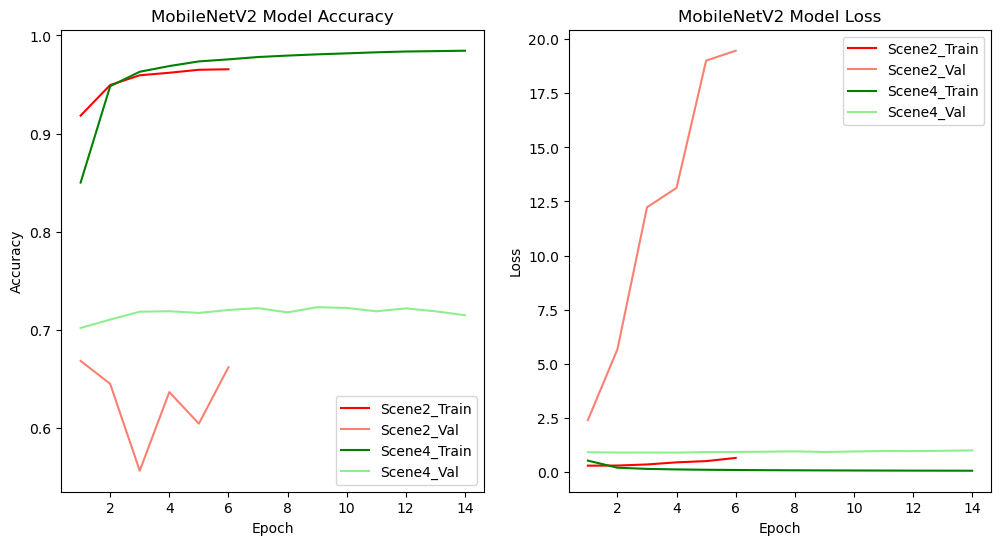

In [271]:
# MobileNetV2 Model
history1 = pd.read_csv(os.path.join(file_path[1], 'history.csv'))
history2 = pd.read_csv(os.path.join(file_path[3], 'history.csv'))
history1.index+=1
history2.index+=1

# plot the accuracy and loss of the model side by side
plt.figure(figsize=(12, 6))

# plot the accuracy
plt.subplot(1, 2, 1)
plt.plot(history1['accuracy'], color='red')
plt.plot(history1['val_accuracy'], color='salmon')
plt.plot(history2['accuracy'], color='green')
plt.plot(history2['val_accuracy'], color='lightgreen')
plt.title('MobileNetV2 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Scene2_Train', 'Scene2_Val', 'Scene4_Train', 'Scene4_Val'], loc='best')

# plot the loss
plt.subplot(1, 2, 2)
plt.plot(history1['loss'], color='red')
plt.plot(history1['val_loss'], color='salmon')
plt.plot(history2['loss'], color='green')
plt.plot(history2['val_loss'], color='lightgreen')
plt.title('MobileNetV2 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Scene2_Train', 'Scene2_Val', 'Scene4_Train', 'Scene4_Val'], loc='best')

plt.show()

### evaluate model

### Evaluation Metrics

In [293]:
# Evaluation Metrics
metrics = []

for path in file_path:
    ev_metrics = pd.read_csv(os.path.join(path, 'model_predictions_evaluation_results.csv'))
    metrics.append([f"Scenario {file_path.index(path)+1}",
                    round(ev_metrics['Accuracy'][0], 2),
                    round(ev_metrics['Precision'][0], 2),
                    round(ev_metrics['Recall'][0], 2),
                    round(ev_metrics['F1-Score'][0], 2)
                    ])

table = tabulate(metrics,
                    headers=['Scenario', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
                    tablefmt='simple_outline',
                    numalign='decimal',
                    stralign='center'
                    )

In [294]:
# Conclusion
print(table)

┌────────────┬────────────┬─────────────┬──────────┬────────────┐
│  Scenario  │   Accuracy │   Precision │   Recall │   F1-Score │
├────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Scenario 1 │       0.9  │        0.9  │     0.9  │       0.89 │
│ Scenario 2 │       0.92 │        0.93 │     0.92 │       0.92 │
│ Scenario 3 │       0.89 │        0.89 │     0.89 │       0.89 │
│ Scenario 4 │       0.94 │        0.94 │     0.94 │       0.94 │
└────────────┴────────────┴─────────────┴──────────┴────────────┘


confusion matrix